In [24]:
import numpy as np
import npquantum as npq
import matplotlib.pyplot as plt

In [25]:
# Oracle will apply a phase flip to the desired answer
# we pick |00> as the answer for now

# qiskit textbook: https://qiskit.org/textbook/ch-algorithms/grover.html#Creating-an-Oracle
identity_mat = np.eye(4)
identity_mat[0,0] = -1
oracle = identity_mat
oracle

array([[-1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [26]:
# change the phase of the desired answer
# Note that right now, all I've done is applied a global phase
# For the algorithm to work you apply the oracle on a superposition state
oracle @ npq.ket00

array([[-1.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [27]:
# Start in the all 0 state
initial_state = npq.ket00
initial_state

array([[1],
       [0],
       [0],
       [0]])

In [28]:
# apply the hadamard to everything
double_hadamard = np.kron(npq.H, npq.H)
double_hadamard

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [29]:
superposition_state = double_hadamard @ initial_state

In [30]:
# note that every possible value, |00> .. |11> has an equal chance of being measured
# The "0.5" may throw you off because, with plain intution 0.5 + 0.5 + 0.5 + 0.5 > 1!

# BUt remember this is also a|00> + b|01> + c|10> + c|11>
# And furthermore, due to the normalization constraint |a|^2 + |b|^2 + |c|^2 + |d|^2 = 1
# Thus, the probability of each state is really |0.5|^2 = 0.25
# And you get 0.25 + 0.25 + 0.25 + 0.25 = 1, which satisfies the constraint
superposition_state

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])

In [31]:
# The current mean
print(np.mean(superposition_state[:,0]))

0.4999999999999999


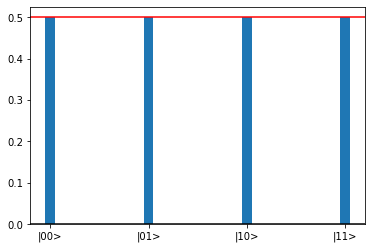

In [32]:
# Current probability amplitudes and mean
labels = ["|00>", "|01>", "|10>", "|11>"]
x_pos = [i for i, _ in enumerate(labels)]
plt.bar(x_pos, superposition_state[:,0], color='tab:blue', width=0.1)
plt.axhline(0, color='black')
plt.axhline(np.mean(superposition_state[:,0]), color='red')
plt.xticks(x_pos, labels)
plt.show()

In [33]:
# now we apply the oracle
phase_flipped_state = oracle @ superposition_state
phase_flipped_state

array([[-0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5]])

In [34]:
# notice that the mean has changed
print(np.mean(phase_flipped_state[:,0]))

0.24999999999999994


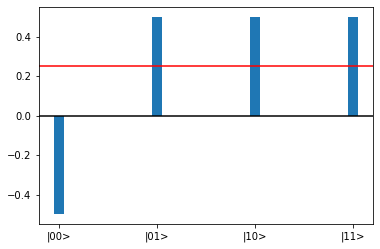

In [35]:
# Look at what happened to the mean and the probability amplitude
labels = ["|00>", "|01>", "|10>", "|11>"]
x_pos = [i for i, _ in enumerate(labels)]
plt.bar(x_pos, phase_flipped_state[:,0], color='tab:blue', width=0.1)
plt.axhline(0, color='black')
plt.axhline(np.mean(phase_flipped_state[:,0]), color='red')
plt.xticks(x_pos, labels)
plt.show()

In [36]:
# define the grover operator
grover_op = double_hadamard @ (2 * (npq.ket00 @ npq.bra00) - np.eye(4)) @ double_hadamard

In [37]:
grover_op

array([[-0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5,  0.5],
       [ 0.5,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, -0.5]])

In [38]:
inversion_about_mean_state = grover_op @ phase_flipped_state
inversion_about_mean_state

array([[1.],
       [0.],
       [0.],
       [0.]])

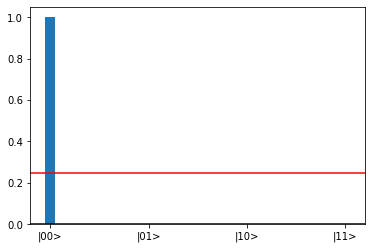

In [39]:
# Look at what happened to the mean and the probability amplitude
labels = ["|00>", "|01>", "|10>", "|11>"]
x_pos = [i for i, _ in enumerate(labels)]
plt.bar(x_pos, inversion_about_mean_state[:,0], color='tab:blue', width=0.1)
plt.axhline(0, color='black')
plt.axhline(np.mean(inversion_about_mean_state[:,0]), color='red')
plt.xticks(x_pos, labels)
plt.show()

# Overdoing it

Recall that if you apply the grover operation too many times you can actually go FURTHER form the correct amplitudes.

In [40]:
final_state = inversion_about_mean_state

In [41]:
# apply the oracle again
phase_flipped_state = oracle @ final_state
phase_flipped_state

array([[-1.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [42]:
print(np.mean(phase_flipped_state[:,0]))

-0.24999999999999983


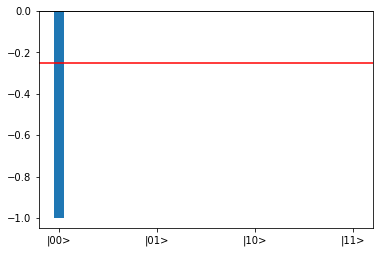

In [43]:
labels = ["|00>", "|01>", "|10>", "|11>"]
x_pos = [i for i, _ in enumerate(labels)]
plt.bar(x_pos, phase_flipped_state[:,0], color='tab:blue', width=0.1)
plt.axhline(0, color='black')
plt.axhline(np.mean(phase_flipped_state[:,0]), color='red')
plt.xticks(x_pos, labels)
plt.show()

In [44]:
# apply grover's operator again
inversion_about_mean_state = grover_op @ phase_flipped_state
inversion_about_mean_state

array([[ 0.5],
       [-0.5],
       [-0.5],
       [-0.5]])

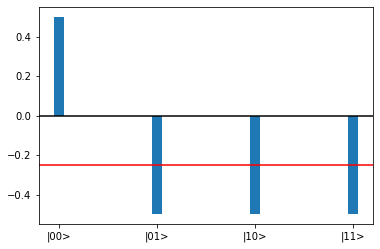

In [47]:
labels = ["|00>", "|01>", "|10>", "|11>"]
x_pos = [i for i, _ in enumerate(labels)]
plt.bar(x_pos, inversion_about_mean_state[:,0], color='tab:blue', width=0.1)
plt.axhline(0, color='black')
plt.axhline(np.mean(inversion_about_mean_state[:,0]), color='red')
plt.xticks(x_pos, labels)
plt.show()

# pretty much back where we started
# if you measure again, you're going to get a 25% chance of the right answer...
# not very useful ):